In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils

In [15]:
# these are the number of lines we will read, so this is the size of our chunk of the dataset
NUMBER_OF_LINES = 2000

data = {}
def load_data(path):
  # read the archived file line by line, add add it to a map
  for i, line in enumerate(open(path, "rt", encoding="utf8")):

      if i == NUMBER_OF_LINES:
          break

      # label 1 is negativ and label 2 is positive
      label = 'Negative' if line[:10] == "__label__1" else 'Positive'
      text = line[10:]

      localResult = {
          "label": label,
          "text": text
      }

      data[i] = localResult

  if path.find('train'):
    df_train = pd.DataFrame(data).T
    return df_train
  elif path.find('test'):
    df_test = pd.DataFrame(data).T
    return df_test

In [16]:
train = load_data('/content/train.ft.txt')
train

,label,text
0,Positive,Stuning even for the non-gamer: This sound tr...
1,Positive,The best soundtrack ever to anything.: I'm re...
2,Positive,Amazing!: This soundtrack is my favorite musi...
3,Positive,Excellent Soundtrack: I truly like this sound...
4,Positive,"Remember, Pull Your Jaw Off The Floor After H..."
...,...,...
1995,Negative,Too Small for a Shower Curtain: This rod is w...
1996,Negative,"Pretty, but not functional: This curtain rod ..."
1997,Negative,Poor Quality: This item does not look like th...
1998,Positive,Umbra tension rod: I am pleased with my Umbra...


In [17]:
test = load_data('/content/test.ft.txt')
test

,label,text
0,Positive,Great CD: My lovely Pat has one of the GREAT ...
1,Positive,One of the best game music soundtracks - for ...
2,Negative,Batteries died within a year ...: I bought th...
3,Positive,"works fine, but Maha Energy is better: Check ..."
4,Positive,Great for the non-audiophile: Reviewed quite ...
...,...,...
1995,Positive,"Amazing!: Love this book, it's the first time..."
1996,Positive,Phenomenal Reading Material! Lots of Fun: I'm...
1997,Positive,Interesting and fun read!: Jeff Corwin is an ...
1998,Positive,Great Children's Story: The Precious Moments ...


In [18]:
train_txt = train['text']

test_txt = test['text']

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_txt)

In [20]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

13144

In [ ]:
# n_gram for train data for text
input_seq_train = []
for sent in train_txt:
    sequence = tokenizer.texts_to_sequences([sent])[0]
    for j in range(1, len(sequence)):
        n_gram = sequence[:j+1]
        input_seq_train.append(n_gram)
input_seq_train

In [22]:
max_len_train = max([len(i) for i in input_seq_train])
max_len_train

200

In [23]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_txt), maxlen= 199)
x_train

array([[   0,    0,    0, ..., 2897,    5,  360],
       [   0,    0,    0, ...,  170,  151, 2483],
       [   0,    0,    0, ...,    6,  469,  263],
       ...,
       [   0,    0,    0, ...,   17,   73,   51],
       [   0,    0,    0, ...,   28, 2230,   67],
       [   0,    0,    0, ..., 1808,    5, 1659]], dtype=int32)

In [24]:
x_test = pad_sequences(tokenizer.texts_to_sequences(test_txt), maxlen= 199)
x_test

array([[   0,    0,    0, ...,   13,   12, 1061],
       [   0,    0,    0, ...,  517,  170,    6],
       [   0,    0,    0, ...,  102, 7353,  189],
       ...,
       [   0,    0,    0, ...,  564,   69, 1879],
       [   0,    0,    0, ...,  140,   22,   64],
       [   0,    0,    0, ...,   33,    1, 1751]], dtype=int32)

In [25]:
# before pad_sequences
print(len(train_txt), 'train sequences')
print(len(test_txt), 'test sequences')

2000 train sequences
2000 test sequences


In [26]:
# after pad_sequences
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)

x_train shape :  (2000, 199)
x_test shape :  (2000, 199)


In [27]:
labels = ['Negative', 'Positive']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train.label.to_list())

LabelEncoder()

In [28]:
y_train = encoder.transform(train.label.to_list())
y_test = encoder.transform(test.label.to_list())

In [29]:
y_train = y_train.reshape(-1,1)
y_train

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [30]:
y_test = y_test.reshape(-1,1)
y_test

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [31]:
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

x_train shape :  (2000, 199)
x_test shape :  (2000, 199)
y_train shape :  (2000, 1)
y_test shape :  (2000, 1)


In [32]:
EMBEDDING_SIZE = 128
HIDDEN_LAYER_SIZE = 128
BATCH_SIZE = 32
NUM_EPOCHS = 15

print('Build model...')
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_SIZE, input_length=max_len_train-1))
model.add(LSTM(HIDDEN_LAYER_SIZE, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# summary of our model.
model.summary()

# Compile the model.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 199, 128)          1682432   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1814145 (6.92 MB)
Trainable params: 1814145 (6.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
print('Train...')
training = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=NUM_EPOCHS,
          validation_data=(x_test, y_test))

Train...
Epoch 1/15
63/63 [==============================] - 50s 721ms/step - loss: 0.6630 - accuracy: 0.6030 - val_loss: 0.6456 - val_accuracy: 0.6720
Epoch 2/15
63/63 [==============================] - 44s 697ms/step - loss: 0.4565 - accuracy: 0.8355 - val_loss: 0.5084 - val_accuracy: 0.7580
Epoch 3/15
63/63 [==============================] - 49s 779ms/step - loss: 0.2539 - accuracy: 0.9095 - val_loss: 0.5478 - val_accuracy: 0.7380
Epoch 4/15
63/63 [==============================] - 48s 772ms/step - loss: 0.1071 - accuracy: 0.9680 - val_loss: 0.5648 - val_accuracy: 0.7780
Epoch 5/15
63/63 [==============================] - 49s 778ms/step - loss: 0.0302 - accuracy: 0.9925 - val_loss: 0.8275 - val_accuracy: 0.7790
Epoch 6/15
63/63 [==============================] - 44s 695ms/step - loss: 0.0301 - accuracy: 0.9925 - val_loss: 0.8047 - val_accuracy: 0.7645
Epoch 7/15
63/63 [==============================] - 44s 702ms/step - loss: 0.0313 - accuracy: 0.9895 - val_loss: 0.9764 - val_accurac

In [34]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=BATCH_SIZE)
print('Test score:', score)
print('Test accuracy:', acc)

63/63 [==============================] - 5s 75ms/step - loss: 1.3085 - accuracy: 0.7595
Test score: 1.308456540107727
Test accuracy: 0.7595000267028809


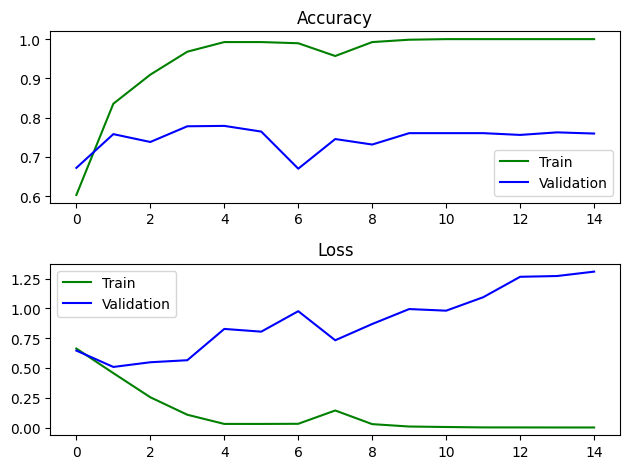

In [35]:
plt.subplot(211)
plt.title("Accuracy")
plt.plot(training.history["accuracy"], color="g", label="Train")
plt.plot(training.history["val_accuracy"], color="b", label="Validation")
plt.legend(loc="best")
plt.subplot(212)
plt.title("Loss")
plt.plot(training.history["loss"], color="g", label="Train")
plt.plot(training.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [37]:
def predict_sentiment(score):
    return "Positive" if score>0.5 else "Negative"
scores = model.predict(x_test, verbose=1, batch_size=10000)
model_predictions = [predict_sentiment(score) for score in scores]

# Now, let us compare the forecasts against the actual test data values.

from sklearn.metrics import classification_report
print(classification_report(list(test.label), model_predictions))

1/1 [==============================] - 3s 3s/step
              precision    recall  f1-score   support

    Negative       0.76      0.72      0.74       954
    Positive       0.76      0.80      0.78      1046

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

